In [25]:
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter
from glob import glob
from sklearn.utils import resample

In [26]:
import pymbar
# sys.path.append("/Users/van/Scripts/pybin")
from pymbar.mbar_pmf import mbar_pmf

In [27]:
pwd

'/scratch/van/PL888/Amber/analysis'

In [70]:
# from glob import glob
n_windows = 42
val_kn = []
for i in range(n_windows):
    # fnames = sorted(glob('../%02d/step6.0?_equilibration.cv' % i))
    # fnames = sorted(glob('../%02d/all_step6.cv' % i))
    fnames = sorted(glob('/scratch/samitha/mt2-b3lyp/%02d/step6.02_equilibration.cv' % i))
    arrays = [np.loadtxt(f, usecols=1)[::] for f in fnames[:]]
    val_kn.append(np.concatenate(arrays))
val0_k = np.linspace(-1.95, 2.15, n_windows)
K_k = np.ones(n_windows) * 300.0
val_min = -1.95
val_max = 2.15
nbins = n_windows -1 

In [71]:
# mbar = mbar_pmf(val_kn, val0_k, K_k, 300.0, u_kn=np.array(ene_pm3))
mbar = mbar_pmf(val_kn, val0_k, K_k, 300.0)

K (total states) = 42, total samples = 168000
N_k = 
[4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000]
There are 42 states with samples.
Initial dimensionless free energies with method BAR
f_k = 
[  0.           0.19153911   0.4201296    0.67721737   1.17253609
   1.8186656    2.60616901   3.60627698   4.82784083   6.39373989
   8.45392519  10.54510068  12.94854287  15.75147778  18.62875326
  21.3036581   23.38864865  25.31083675  26.35839813  26.63044575
  25.75820877  23.86053168  20.54537165  16.04414281  10.60866381
   4.41440853  -2.06742151  -8.44003405 -14.39480971 -21.06078562
 -26.9817384  -31.83456875 -35.97247226 -38.90825585 -41.72820048
 -44.11089203 -46.02239476 -47.36333382 -48.42418763 -49.15533801
 -49.77321646 -50.09919729]
Determining dimensionless free energies by Newton-Raphson / self-consistent iteratio

In [72]:
# bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins, u_kn=np.array(ene_pm3))
bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins)
bin_centers, f_i, df_i, reweighting_entropy = mbar.get_pmf(val_min, val_max, nbins, uncertainties='from-specified', pmf_reference=f_i[:20].argmin())
np.savetxt("freefile_mbar", np.column_stack((bin_centers, f_i, df_i)))

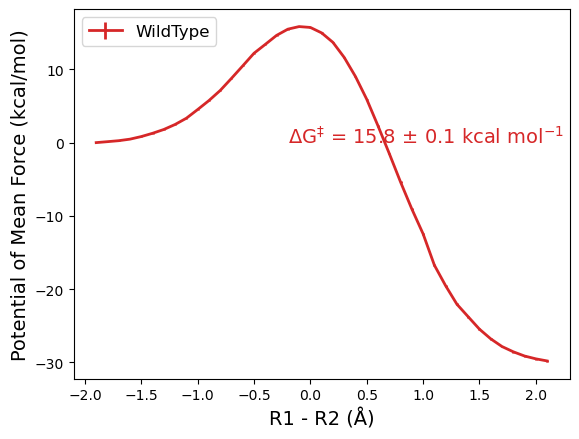

In [73]:
initial = np.loadtxt('freefile_mbar')
plt.errorbar(initial[:,0], initial[:,1] - initial[:10,1].min(), yerr=initial[:,2], linewidth=2, c='tab:red', label='WildType')
plt.text(-0.2, 0,'$\Delta$G$^\ddag$ = ' + str(np.round(initial[:,1].max() - initial[:10,1].min(),1)) + ' $\pm$ ' + str(np.round(initial[initial[:,1].argmax()][2],1)) + ' kcal mol$^{-1}$', c='tab:red', fontsize=14)
plt.xlabel("R1 - R2 (Å)", fontsize=14)
plt.ylabel("Potential of Mean Force (kcal/mol)", fontsize=14)
plt.legend(loc=2, fontsize=12)
plt.savefig("pmf-step2.png", dpi=300, bbox_inches='tight')
plt.show()

In [69]:
val_kn

[array([-1.911, -1.931, -2.093, ..., -2.019, -1.906, -1.944]),
 array([-1.866, -1.819, -1.885, ..., -1.893, -1.869, -1.893]),
 array([-1.732, -1.739, -1.787, ..., -1.753, -1.725, -1.75 ]),
 array([-1.675, -1.68 , -1.673, ..., -1.627, -1.594, -1.611]),
 array([-1.554, -1.592, -1.568, ..., -1.631, -1.499, -1.706]),
 array([-1.448, -1.428, -1.492, ..., -1.459, -1.396, -1.525]),
 array([-1.278, -1.364, -1.406, ..., -1.35 , -1.346, -1.384]),
 array([-1.251, -1.297, -1.316, ..., -1.237, -1.269, -1.341]),
 array([-1.163, -1.16 , -1.194, ..., -1.11 , -1.176, -1.189]),
 array([-1.091, -1.104, -1.129, ..., -1.147, -1.042, -1.071]),
 array([-0.953, -1.066, -1.042, ..., -1.03 , -0.931, -1.076]),
 array([-0.892, -0.955, -0.944, ..., -0.893, -0.861, -0.913]),
 array([-0.894, -0.783, -0.853, ..., -0.839, -0.792, -0.832]),
 array([-0.733, -0.71 , -0.724, ..., -0.651, -0.717, -0.723]),
 array([-0.56 , -0.785, -0.706, ..., -0.603, -0.6  , -0.617]),
 array([-0.565, -0.529, -0.694, ..., -0.493, -0.509, -0